### Preprocessing Scraped Text Data

From the Google Trends analysis, this project will focus on three design aesthetics that are recently popular and possibly more unfamiliar to the public. 
1. Midcentury Modern (MCM)
2. Boho Chic
3. Farmhouse 

In [1]:
import requests
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import re
import seaborn as sns
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
import functools
from nltk.stem import WordNetLemmatizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from collections import Counter
import requests
import pickle
from nltk.probability import FreqDist
import seaborn as sns

#### Import Pickled Data

In [2]:
data = pd.read_pickle('pickles/new_corpus.pkl')
data.shape

(70, 1)

In [3]:
style = []
for s in data.index:
    if 'm' in s:
        style.append(0)
    if 'b' in s:
        style.append(1)
    if 'f' in s:
        style.append(2)
len(style)

70

In [4]:
data['label'] = style

In [5]:
data

,text,label
index,,
f0,When actor Sam Page and his wife Cassidy Ellio...,2
f1,"When Casey Wilson and her husband, David Caspe...",2
f0,"When beginning construction, Austin-based cont...",2
f1,"A Kennebunk family needed their forever home, ...",2
f2,A modern farmhouse exterior is often a perfect...,2
...,...,...
b0,“I spent so much time going to work when my ...,1
b0,Adding a few floor cushions to your living roo...,1
b0,"Before there were Instagram influencers, there...",1


### Preprocessing

In [6]:
def text_preprocessing(corpus):
    '''preprocess text data'''
    stopwords = text.ENGLISH_STOP_WORDS
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    clean_filtered = []
    lemmatizer = WordNetLemmatizer()

    corpus = re.sub("[^a-zA-Z]", " ", corpus)
    corpus = corpus.lower()
   
    tokens = nltk.word_tokenize(corpus)
        
    for w in tokens:
        if w not in stopwords:
            if w not in symbols:
                clean_filtered.append(lemmatizer.lemmatize(w))
                
    sentence = ', '.join(clean_filtered)
                                      
    return sentence
                                      
clean = lambda x: text_preprocessing(x)

In [7]:
clean_data = pd.DataFrame(data.text.apply(clean))

In [8]:
clean_data

,text
index,
f0,"actor, sam, page, wife, cassidy, elliott, bega..."
f1,"casey, wilson, husband, david, caspe, started,..."
f0,"beginning, construction, austin, based, contra..."
f1,"kennebunk, family, needed, forever, home, old,..."
f2,"modern, farmhouse, exterior, perfect, blend, m..."
...,...
b0,"spent, time, going, work, kid, younger, person..."
b0,"adding, floor, cushion, living, room, immediat..."
b0,"instagram, influencers, victoria, smith, calif..."


### First Model | Naive Bayes 

In [9]:
def naive_bayes_clf(data): 
    '''Text classification with Naive Bayes. Returns y_test, y_hat'''
    clf = MultinomialNB()

    clean_data = pd.DataFrame(data.text.apply(clean))

    X = clean_data.text
    y = data.label
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    data_vec = tfidf.fit_transform(X_train)
    train_dtm = pd.DataFrame(data_vec.toarray(), columns=tfidf.get_feature_names())
    train_dtm.index = X_train.index

    clf.fit(train_dtm, y_train)

    data_vec = tfidf.transform(X_test)
    test_dtm = pd.DataFrame(data_vec.toarray(), columns=tfidf.get_feature_names())
    test_dtm.index = X_test.index
    
    X_test = test_dtm.reset_index(drop = True)
    y_hat = clf.predict(test_dtm)
    
    return y_test, y_hat

In [10]:
tfidf = TfidfVectorizer(stop_words = 'english', lowercase = False)

y_test, y_hat = naive_bayes_clf(data)

In [11]:
print(metrics.confusion_matrix(y_test, y_hat))
print(metrics.classification_report(y_test, y_hat, digits=3))

[[7 0 0]
 [2 1 2]
 [1 0 8]]
              precision    recall  f1-score   support

           0      0.700     1.000     0.824         7
           1      1.000     0.200     0.333         5
           2      0.800     0.889     0.842         9

    accuracy                          0.762        21
   macro avg      0.833     0.696     0.666        21
weighted avg      0.814     0.762     0.715        21



#### Readjusting preprocessing to include only adjectives

In [12]:
def text_preprocessing_v2(corpus):
    stopwords = text.ENGLISH_STOP_WORDS
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    clean_filtered = []

    lemmatizer = WordNetLemmatizer()

    corpus = re.sub("[^a-zA-Z]", " ", corpus)
    corpus = corpus.lower()
   
    tokens = nltk.word_tokenize(corpus)
    
    pos_tags = nltk.pos_tag(tokens)
    
    for w,t in pos_tags:
        if w not in stopwords:
            if t == 'JJ' or 'NN':   
                if w not in symbols:
                    clean_filtered.append(lemmatizer.lemmatize(w))
                
    sentence = ', '.join(clean_filtered)
        
        
    return sentence

clean = lambda x: text_preprocessing_v2(x)

In [13]:
clean_data = pd.DataFrame(data.text.apply(clean))
clean_data

,text
index,
f0,"actor, sam, page, wife, cassidy, elliott, bega..."
f1,"casey, wilson, husband, david, caspe, started,..."
f0,"beginning, construction, austin, based, contra..."
f1,"kennebunk, family, needed, forever, home, old,..."
f2,"modern, farmhouse, exterior, perfect, blend, m..."
...,...
b0,"spent, time, going, work, kid, younger, person..."
b0,"adding, floor, cushion, living, room, immediat..."
b0,"instagram, influencers, victoria, smith, calif..."


In [14]:
data = pd.read_pickle('pickles/new_corpus.pkl')

style = []
for s in data.index:
    if 'm' in s:
        style.append(0)
    if 'b' in s:
        style.append(1)
    if 'f' in s:
        style.append(2)
len(style)

data['label'] = style

In [15]:
y_test, y_hat = naive_bayes_clf(data)

In [16]:
print(metrics.confusion_matrix(y_test, y_hat))
print(metrics.classification_report(y_test, y_hat, digits=3))

[[7 0 0]
 [2 1 2]
 [1 0 8]]
              precision    recall  f1-score   support

           0      0.700     1.000     0.824         7
           1      1.000     0.200     0.333         5
           2      0.800     0.889     0.842         9

    accuracy                          0.762        21
   macro avg      0.833     0.696     0.666        21
weighted avg      0.814     0.762     0.715        21



After running this model several times, it's clear that the lack of data is causing the model to be very inconsistent. Next step will be to do some more scraping to add to the dataset. 

### Adding more data to the corpus

In [17]:
data2 = pd.read_pickle('pickles/add_corpus2.pkl')

In [18]:
style = []
for s in data2.index:
    if 'm' in s:
        style.append(0)
    if 'b' in s:
        style.append(1)
    if 'f' in s:
        style.append(2)

data2['label'] = style

In [19]:
data2

,text,label
index,,
m0,Sarah Phipps Design When it comes to creating ...,0
m1,dreamgreendiy / Instagram From hairpin-legged ...,0
m2,The design era known today as midcentury moder...,0
m3,Neat Organization and Design Mid-century moder...,0
m4,The design era known today as midcentury moder...,0
m5,Solidago / iStock / Getty Images Best-known fo...,0
m6,"Design is a lot of things, not all of them at ...",0
m7,"Decorating trends come and go, but to be hones...",0
m8,captainsecret / Getty Images Mid-century mode...,0


In [20]:
data = data.append(data2)
data.shape

(126, 2)

In [21]:
y_test, y_hat = naive_bayes_clf(data)

In [22]:
print(metrics.confusion_matrix(y_test, y_hat))
print(metrics.classification_report(y_test, y_hat, digits=3))

[[17  0  0]
 [ 5  2  0]
 [ 3  3  8]]
              precision    recall  f1-score   support

           0      0.680     1.000     0.810        17
           1      0.400     0.286     0.333         7
           2      1.000     0.571     0.727        14

    accuracy                          0.711        38
   macro avg      0.693     0.619     0.623        38
weighted avg      0.746     0.711     0.692        38



Although these results are more stable, the data is highly skewed for MCM.

### Working with Paragraphs vs. Articles

Instead of scraping more articles, the data will be split into paragraphs creating a larger dataset. This will also account for nuiances in the articles as many of these were slideshows - not a continuous article. 

I am also hoping that this will create better TF-IDF scores as the term frequency and document frequency ratio will be changing. 

In [23]:
data = pd.read_pickle('pickles/paragraphed_corpus.pkl')
data2 = pd.read_pickle('pickles/paragraphed_corpus2.pkl')
data = data.append(data2)

style = []
for s in data.index:
    if 'm' in s:
        style.append(0)
    if 'b' in s:
        style.append(1)
    if 'f' in s:
        style.append(2)
len(style)

data['label'] = style 

In [24]:
y_test, y_hat = naive_bayes_clf(data)

In [25]:
print(metrics.confusion_matrix(y_test, y_hat))
print(metrics.classification_report(y_test, y_hat, digits=3))

[[229   2   6]
 [ 88  33  22]
 [ 23   1 120]]
              precision    recall  f1-score   support

           0      0.674     0.966     0.794       237
           1      0.917     0.231     0.369       143
           2      0.811     0.833     0.822       144

    accuracy                          0.729       524
   macro avg      0.800     0.677     0.661       524
weighted avg      0.778     0.729     0.686       524



Much better results here for Farmhouse. Boho-Chic is still performing poorly, making me think that there's overlap between classes and possibly a lack of quality text in the Boho-Chic class. 

### Modeling with RandomForest 

In an attempt to bump up the Boho-Chic recall score, a RandomForest classifier will be applied. 

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
data = pd.read_pickle('pickles/paragraphed_corpus.pkl')
data2 = pd.read_pickle('pickles/paragraphed_corpus2.pkl')
data = data.append(data2)

style = []
for s in data.index:
    if 'm' in s:
        style.append(0)
    if 'b' in s:
        style.append(1)
    if 'f' in s:
        style.append(2)
len(style)

data['label'] = style 

clean_data = pd.DataFrame(data.text.apply(clean))

In [28]:
clean_data.head()

,text
index,
f1,"actor, sam, page, wife, cassidy, elliott, bega..."
f2,"couple, ultimately, decided, pacific, palisade..."
f3,"kitchen, remodel, hardest, month, long, renova..."
f4,"modernize, kitchen, bathroom, create, decor, r..."
f5,"elliott, describes, personal, design, style, t..."


In [29]:
X = clean_data.text
y = data.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
print(X_test.shape)
print(y_test.shape)

(437,)
(437,)


In [31]:
data_vec = tfidf.fit_transform(X_train)
train_dtm = pd.DataFrame(data_vec.toarray(), columns=tfidf.get_feature_names())
train_dtm.index = X_train.index

data_vec = tfidf.transform(X_test)
test_dtm = pd.DataFrame(data_vec.toarray(), columns=tfidf.get_feature_names())
test_dtm.index = X_test.index

In [32]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini')

clf.fit(train_dtm,y_train)
y_hat=clf.predict(test_dtm)

In [33]:
print(metrics.confusion_matrix(y_test, y_hat))
print(metrics.classification_report(y_test, y_hat, digits=3))

[[174  11  10]
 [ 59  52   8]
 [ 17   6 100]]
              precision    recall  f1-score   support

           0      0.696     0.892     0.782       195
           1      0.754     0.437     0.553       119
           2      0.847     0.813     0.830       123

    accuracy                          0.746       437
   macro avg      0.766     0.714     0.722       437
weighted avg      0.754     0.746     0.733       437



##### Looking at feature importances and adding unimportant words to the stop words list

In [34]:
importance_zipped = dict(zip(train_dtm, clf.feature_importances_))

In [35]:
add_stop = [w for w,v in importance_zipped.items() if v == 0]
add_stop.append('s')
add_stop.append('room')
add_stop.append('home')
add_stop.append('space')
add_stop.append('spruce')
StopWords = nltk.corpus.stopwords.words('english')
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop)

In [36]:
tfidf = TfidfVectorizer(stop_words = stop_words, lowercase = False)

clf.fit(train_dtm,y_train)
y_hat=clf.predict(test_dtm)

In [37]:
print(metrics.confusion_matrix(y_test, y_hat))
print(metrics.classification_report(y_test, y_hat, digits=3))

[[164  16  15]
 [ 56  54   9]
 [ 19   7  97]]
              precision    recall  f1-score   support

           0      0.686     0.841     0.756       195
           1      0.701     0.454     0.551       119
           2      0.802     0.789     0.795       123

    accuracy                          0.721       437
   macro avg      0.730     0.694     0.701       437
weighted avg      0.723     0.721     0.711       437



While Boho-Chic is performing better with this model, the other two classes have decreased in performance. I don't believe that a 45% recall for Boho-Chic is worth sacrificing the higher scores for the other classes. 

In [38]:
# param_grid = {
#     'n_estimators': [10, 30, 100],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 2, 6, 10]}


# grid_search = GridSearchCV(clf, param_grid, cv=3, scoring = 'recall_weighted')
# grid_search.fit(train_dtm, y_train)

# print(f"Optimal Parameters: {grid_search.best_params_}")

In [39]:
clf = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth = None, n_estimators = 100)

clf.fit(train_dtm,y_train)
y_hat=clf.predict(test_dtm)

print(metrics.confusion_matrix(y_test, y_hat))
print(metrics.classification_report(y_test, y_hat, digits=3))

[[168  15  12]
 [ 60  51   8]
 [ 17   6 100]]
              precision    recall  f1-score   support

           0      0.686     0.862     0.764       195
           1      0.708     0.429     0.534       119
           2      0.833     0.813     0.823       123

    accuracy                          0.730       437
   macro avg      0.742     0.701     0.707       437
weighted avg      0.733     0.730     0.718       437



In [40]:
sorted_dict = {k: v for k, v in sorted(importance_zipped.items(), key=lambda item: item[1])}
importance_list = list(sorted_dict.keys())[-20:]
importance_values = list(sorted_dict.values())[-20:]
top_20 = dict(zip(importance_list, importance_values))
top_df = pd.DataFrame.from_dict(top_20, orient = 'index', columns = ['values']).reset_index()
top_df.sort_values(inplace = True, ascending = False, by = ['values'])

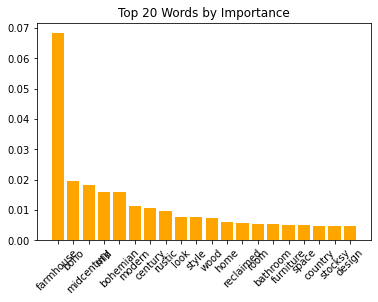

In [41]:
plt.bar(data = top_df, x = 'index', height = 'values', color = 'orange');
#plt.ylim((0,.01));
plt.xticks(rotation = 45);
plt.title('Top 20 Words by Importance');

#### Try NB With Added Stop Words

In [42]:
tfidf = TfidfVectorizer(stop_words = stop_words)
y_test, y_hat = naive_bayes_clf(data)

In [43]:
print(metrics.confusion_matrix(y_test, y_hat))
print(metrics.classification_report(y_test, y_hat, digits=3))

[[231   2   4]
 [ 86  38  19]
 [ 23   1 120]]
              precision    recall  f1-score   support

           0      0.679     0.975     0.801       237
           1      0.927     0.266     0.413       143
           2      0.839     0.833     0.836       144

    accuracy                          0.742       524
   macro avg      0.815     0.691     0.683       524
weighted avg      0.791     0.742     0.705       524



In [44]:
tfidf_values = dict(zip(tfidf.get_feature_names(), tfidf.idf_))
values_df = pd.DataFrame.from_dict(tfidf_values, orient = 'index', columns = ['value'])
values_df.sort_values(by = ['value'],ascending = False, inplace = True)
values_df.head()

,value
aaron,7.415915
lit,7.415915
lighthearted,7.415915
limewashed,7.415915
limoges,7.415915


In [45]:
clf = MultinomialNB()
clean_data = pd.DataFrame(data.text.apply(clean))

X = clean_data.text
y = data.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

data_vec = tfidf.fit_transform(X_train)
train_dtm = pd.DataFrame(data_vec.toarray(), columns=tfidf.get_feature_names())
train_dtm.index = X_train.index

clf.fit(train_dtm, y_train)

data_vec = tfidf.transform(X_test)
test_dtm = pd.DataFrame(data_vec.toarray(), columns=tfidf.get_feature_names())
test_dtm.index = X_test.index
    
X_test = test_dtm.reset_index(drop = True)
y_hat = clf.predict(test_dtm)

Recall Score: 0.691
Precision Score: 0.815
Accuracy Score: 0.742


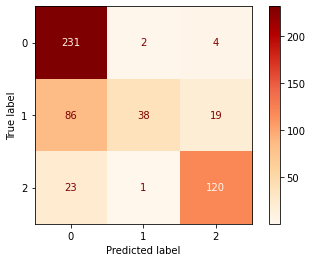

In [46]:
cmv = plot_confusion_matrix
cmv(clf, test_dtm, y_test, cmap = 'OrRd');
print('Recall Score: {}'.format(recall_score(y_test, y_hat, average = 'macro').round(3)))
print('Precision Score: {}'.format(precision_score(y_test, y_hat, average = 'macro').round(3)))
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_hat).round(3)))

### NGrams

In [47]:
tfidf = TfidfVectorizer(stop_words = stop_words, lowercase = False, ngram_range = (1,2))

In [48]:
y_test, y_hat = naive_bayes_clf(data)

print(metrics.confusion_matrix(y_test, y_hat))
print(metrics.classification_report(y_test, y_hat, digits=3))

[[234   2   1]
 [119  19   5]
 [ 32   1 111]]
              precision    recall  f1-score   support

           0      0.608     0.987     0.752       237
           1      0.864     0.133     0.230       143
           2      0.949     0.771     0.851       144

    accuracy                          0.695       524
   macro avg      0.807     0.630     0.611       524
weighted avg      0.771     0.695     0.637       524



After trying (1,2), (2,2), and (2,3) ngram_ranges, none of them performed as well as using only unigrams

### Applying a Voting Classifier

As a last ditch effort, applying a Voting Classifier to try and find the highest scores from both types of classification  models used above. 

In [49]:
X = clean_data.text
y = data.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

data_vec = tfidf.fit_transform(X_train)
train_dtm = pd.DataFrame(data_vec.toarray(), columns=tfidf.get_feature_names())
train_dtm.index = X_train.index

clf.fit(train_dtm, y_train)

data_vec = tfidf.transform(X_test)
test_dtm = pd.DataFrame(data_vec.toarray(), columns=tfidf.get_feature_names())
test_dtm.index = X_test.index

clf1 = MultinomialNB()
clf2 = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth = None, n_estimators = 100)

eclf1 = VotingClassifier(estimators=[('gnb', clf1), ('rf', clf2)])

eclf1 = eclf1.fit(train_dtm, y_train)
y_hat = eclf1.predict(test_dtm)

In [50]:
print(metrics.confusion_matrix(y_test, y_hat))
print(metrics.classification_report(y_test, y_hat, digits=3))

[[192   2   1]
 [100  17   2]
 [ 31   2  90]]
              precision    recall  f1-score   support

           0      0.594     0.985     0.741       195
           1      0.810     0.143     0.243       119
           2      0.968     0.732     0.833       123

    accuracy                          0.684       437
   macro avg      0.791     0.620     0.606       437
weighted avg      0.758     0.684     0.631       437



In [51]:
X_train.to_pickle('pickles/X_train.pkl')
y_train.to_pickle('pickles/y_train.pkl')
pickle.dump(clf1, open('pickles/finalized_clf.sav','wb'))
tfidf = TfidfVectorizer(stop_words = stop_words, lowercase = False)
pickle.dump(tfidf, open('pickles/finalized_vec.sav', 'wb'))

### Create Some Visuals/ Post-Modeling EDA

In [52]:
name = []
for s in clean_data.index:
    if 'm' in s:
        name.append('MCM')
    if 'b' in s:
        name.append('Boho-Chic')
    if 'f' in s:
        name.append('Farmhouse')

clean_data['name'] = name

In [53]:
m_data = clean_data.loc[clean_data['name'] == 'MCM']
b_data = clean_data.loc[clean_data['name'] == 'Boho-Chic']
f_data = clean_data.loc[clean_data['name'] =='Farmhouse']

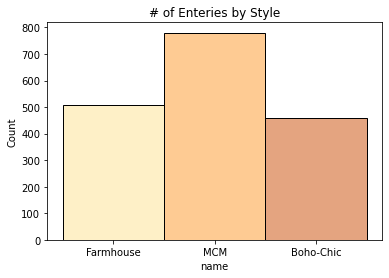

In [54]:
sns.histplot(data = clean_data, x= 'name', palette = 'YlOrBr', hue = 'name', legend = False);
plt.title('# of Enteries by Style');

In [55]:
word_counter = Counter(''.join(clean_data['text']).split())

count_dict = {w: c for w,c in word_counter.most_common(21)}
count_dict.pop('s,')

752

In [56]:
count_dict

{'room,': 454,
 'farmhouse,': 416,
 'modern,': 402,
 'space,': 398,
 'home,': 391,
 'design,': 371,
 'style,': 363,
 'wall,': 266,
 'color,': 251,
 'white,': 251,
 'like,': 222,
 'chair,': 217,
 'wood,': 215,
 'living,': 215,
 'century,': 203,
 'say,': 193,
 'bedroom,': 193,
 'house,': 181,
 'look,': 181,
 'mid,': 180}

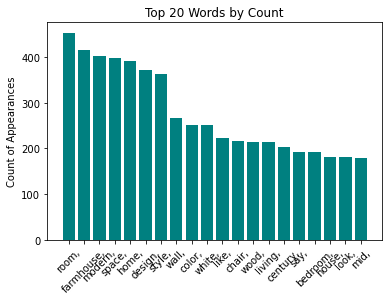

In [57]:
plt.bar(x = count_dict.keys(), height = count_dict.values(), color = 'teal')
plt.xticks(rotation=45);
plt.ylabel('Count of Appearances')
plt.title('Top 20 Words by Count');

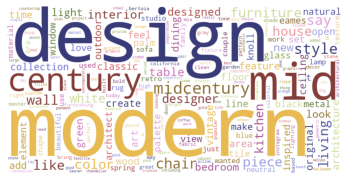

In [58]:
wordcloud = WordCloud(background_color = 'white', colormap = 'tab20b', collocations = False, 
                      stopwords = stop_words, random_state=42, width = 800, height = 400).generate(' '.join(m_data['text']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

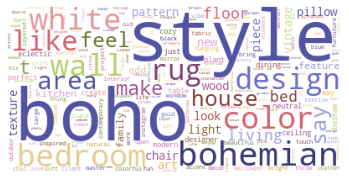

In [59]:
wordcloud = WordCloud(background_color = 'white', colormap = 'tab20b', collocations = False, 
                      stopwords = stop_words, random_state = 42).generate(' '.join(b_data['text']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

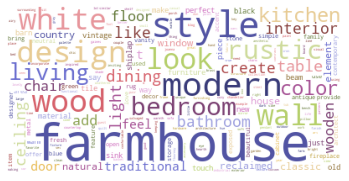

In [60]:
wordcloud = WordCloud(background_color = 'white', colormap = 'tab20b', collocations = False, 
                      stopwords = stop_words, random_state = 42).generate(' '.join(f_data['text']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Plotting Word Importance & Distribution 
Hoping to find a solid answer for why Boho continues to perform poorly

In [61]:
sorted_dict = {k: v for k, v in sorted(importance_zipped.items(), key=lambda item: item[1])}
importance_list = list(sorted_dict.keys())
top_20 = importance_list[-20:]

In [62]:
m_fd = FreqDist(nltk.word_tokenize(' '.join(m_data.text)))
b_fd = FreqDist(nltk.word_tokenize(' '.join(b_data.text)))
f_fd = FreqDist(nltk.word_tokenize(' '.join(f_data.text)))

m_norm = [c / float(m_fd.N()) for c in m_fd.values()]
b_norm = [c / float(b_fd.N()) for c in b_fd.values()]
f_norm = [c / float(f_fd.N()) for c in f_fd.values()]

m_dict = dict(zip(m_fd.keys(), m_norm))
b_dict = dict(zip(b_fd.keys(), b_norm))
f_dict = dict(zip(f_fd.keys(), f_norm))

m_top = {}
for w,f in m_dict.items():
    if w in top_20:
        m_top.update({w:f})
m_top = {k: v for k, v in sorted(m_top.items(), key=lambda item: item[1])}
   
b_top = {}
for w,f in b_dict.items():
    if w in top_20:
        b_top.update({w:f})
b_top = {k: v for k, v in sorted(b_top.items(), key=lambda item: item[1])}
        
f_top = {}
for w,f in f_dict.items():
    if w in top_20:
        f_top.update({w:f})
f_top = {k: v for k, v in sorted(f_top.items(), key=lambda item: item[1])}

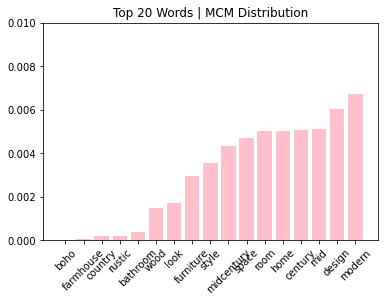

In [63]:
plt.bar(x = m_top.keys(), height = m_top.values(), color = 'pink');
plt.ylim((0,.01));
plt.xticks(rotation = 45);
plt.title('Top 20 Words | MCM Distribution');

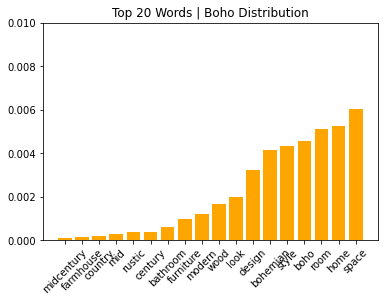

In [64]:
plt.bar(x = b_top.keys(), height = b_top.values(), color = 'orange');
plt.ylim((0,.01));
plt.xticks(rotation = 45);
plt.title('Top 20 Words | Boho Distribution');

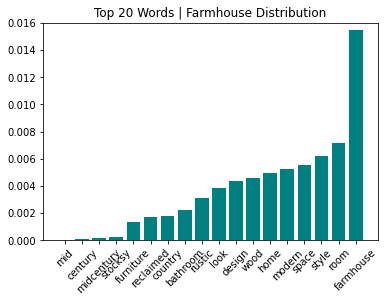

In [65]:
plt.bar(x = f_top.keys(), height = f_top.values(), color = 'teal');
plt.ylim((0,.016));
plt.xticks(rotation = 45);
plt.title('Top 20 Words | Farmhouse Distribution');

### Using Etsy's API to Test Products

Finally, using the trained model on Etsy product to see how Etsy product descriptions compare to the "source of truth" created for this project. 

In [66]:
url = 'https://openapi.etsy.com/v2/listings/active?limit=25&offset=0'
params = {'api_key': 'u7fh0vxd5gjlbfyb5xv4563x', 'region': 'US', 'tags': ['Midcentury']}

response = requests.get(url = url, params = params)

In [67]:
response.status_code

200

In [68]:
etsy_data = response.json()

results = etsy_data.get('results')
titles = [results[i]['title'] for i in range(len(results))]
descriptions = [results[i]['description'] for i in range(len(results))]
tags = [results[i]['tags'] for i in range(len(results))]

etsy_df = pd.DataFrame(titles, descriptions).reset_index()
etsy_df.rename(columns = {'index': 'description'}, inplace = True)
etsy_df['tags'] = tags

In [69]:
def differentiating_aesthetics_new_data(data):
    '''used for new data input to a trained NLP model classing design aesthetics'''
    
    clf = pickle.load(open('pickles/finalized_clf.sav', 'rb'))
    tfidf = pickle.load(open('pickles/finalized_vec.sav', 'rb'))
    X_train = pd.read_pickle('pickles/X_train.pkl')
    y_train = pd.read_pickle('pickles/y_train.pkl')
    
    clean = lambda x: text_preprocessing(x)
    clean_data = pd.DataFrame(data.description.apply(clean))
    
    data_vec = tfidf.fit_transform(X_train)
    train_dtm = pd.DataFrame(data_vec.toarray(), columns=tfidf.get_feature_names())
    
    clf.fit(train_dtm, y_train)

    data_vec = tfidf.transform(clean_data.description)
    new_dtm = pd.DataFrame(data_vec.toarray(), columns=tfidf.get_feature_names())

    y_hat=clf.predict(new_dtm)
    
    return y_hat

In [70]:
mcm_y_hat = differentiating_aesthetics_new_data(etsy_df)

correct = []
for n in mcm_y_hat: 
    if n == 0:
        correct.append(n)
len(correct)/25

0.92

In [71]:
url = 'https://openapi.etsy.com/v2/listings/active?limit=25&offset=0'
params = {'api_key': 'u7fh0vxd5gjlbfyb5xv4563x', 'region': 'US', 'tags': ['Farmhouse']}

response = requests.get(url = url, params = params)

etsy_data = response.json()

results = etsy_data.get('results')
titles = [results[i]['title'] for i in range(len(results))]
descriptions = [results[i]['description'] for i in range(len(results))]
tags = [results[i]['tags'] for i in range(len(results))]

etsy_df = pd.DataFrame(titles, descriptions).reset_index()
etsy_df.rename(columns = {'index': 'description'}, inplace = True)
etsy_df['tags'] = tags

In [72]:
farmhouse_y_hat = differentiating_aesthetics_new_data(etsy_df)
correct = []
for n in farmhouse_y_hat: 
    if n == 2:
        correct.append(n)
print('Correctly classed Farmhouse product: ', len(correct) / 25)

Correctly classed Farmhouse product:  0.24


### Conclusion & Recommendations

##### Conclusion:
Etsy product descriptions could use some work if a correllation with this source of truth is important. An update to descriptions to better match the source of truth could lead to improved search results and an increase in sales. 

The NLP model correctly classes Mid-Century Modern and Farmhouse classes with good consistency, however Boho-Chic requires more data and further training before being used to test any product data. 

##### Recommendations: 
1. Refined Search Results: Improve search results by implementing source-of-truth classification
2. Product Tag Recommendations: Recommend product tags for sellers based on product descriptions, or recommend buzzwords for descriptions when tags are chosen first 
3.Centralized Source-of-Truth: Resources for sellers to familiarize themselves with different aesthetics allowing for better product descriptions and potentially more sales

##### Future Work: 
1. Improve Boho Recall: Gather more quality, descriptive text data that will add to overall quality and feature importance 
2. Expand Aesthetics: Train model on additional design aesthetics such as Art Deco and Minimalism 